In [2]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./events.csv')

/home/seba/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
# to datetime:

df['timestamp'] = pd.to_datetime(df['timestamp'])

In [9]:
# Agrego col con nombre del dia
comprados = df.loc[df['event'] == 'conversion']
comprados['weekday name'] = df['timestamp'].dt.weekday_name

/home/seba/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Cantidad de compras por dia de la semana

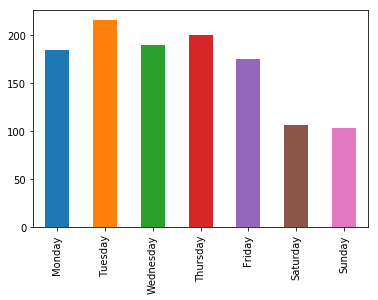

In [10]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

comprados['weekday name'].value_counts().reindex(days).plot(kind='bar')

## Cantidad total de eventos por horario

Text(0.5,0,'Hour (24hs)')

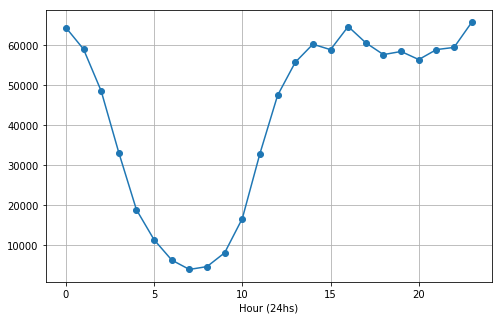

In [11]:
df_hr = df.filter(items = ['country','timestamp', 'event'])

df_hr['hour'] = df_hr['timestamp'].dt.hour

gr = df_hr['hour'].value_counts(sort=False).plot(kind='line', figsize=(8, 5), grid=True, style="-o")
gr.set_xlabel('Hour (24hs)')

# como pongo mas nums en el eje x??

# Analisis de Eventos:

## Cantidad de cada tipo de evento:

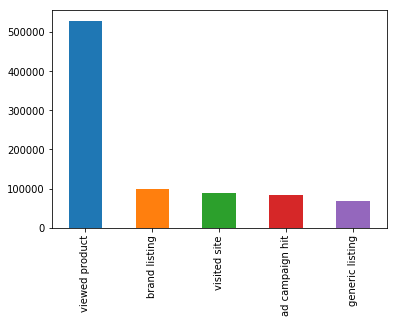

In [107]:
# 5 predominantes:
eventos = df['event'].value_counts()
eventos.head().plot(kind='bar')

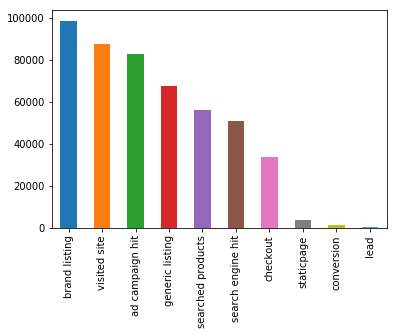

In [111]:
# Sacando evento 'viewed products':

df['event'].loc[df['event'] != 'viewed product'].value_counts().plot(kind='bar')

## Cantidad de eventos totales por pais

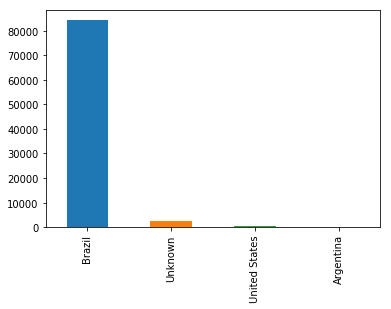

In [268]:
# los 4 predominantes:
# el grafico es feo

df_short = df.filter(items = ['event', 'country'])
df_short['country'].value_counts().head(4).plot(kind='bar')

## Cantidad de eventos 'viewed product' por mes

Text(0.5,0,'Month')

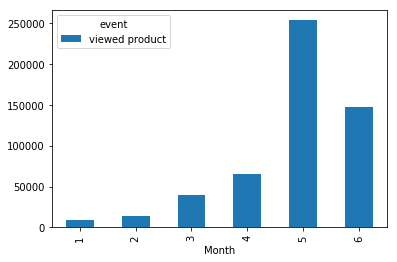

In [269]:
df_event_vp = df.loc[df['event'] == 'viewed product' ]
g = df_event_vp.groupby([df['timestamp'].dt.month, 'event']).size().unstack()\
                        .plot(kind='bar')
g.set_xlabel("Month")

## cant ckeckouts >>> cant conversions:

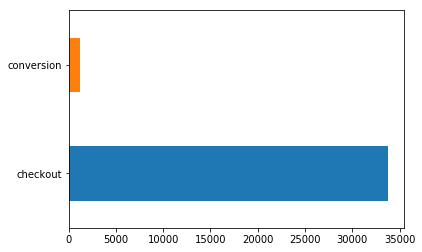

In [270]:
#mal grafico?
df_event = df.filter(items = ['event', 'timestamp'])
checkout_vs_conv = df_event.loc[(df['event'] == 'checkout') | (df['event'] == 'conversion')]
checkout_vs_conv['event'].value_counts().plot(kind='barh')

## Modelos mas comprados:

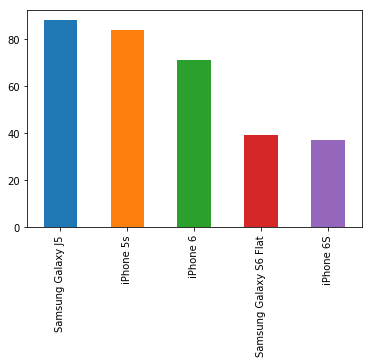

In [260]:
df_event_mod = df.filter(items = ['event', 'model'])
df_event_mod.loc[df_event_sku['event'] == 'conversion']['model'].value_counts().head().plot(kind='bar')

## Cantidad de comprados por condicion del producto

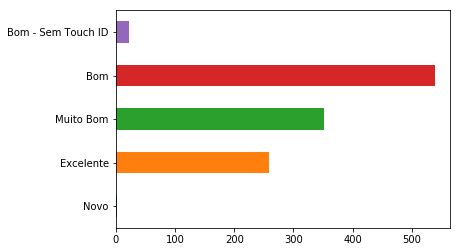

In [261]:
comprados = df.loc[df['event'] == 'conversion']

qual = ['Novo', 'Excelente', 'Muito Bom', 'Bom', 'Bom - Sem Touch ID']
comprados['condition'].value_counts().reindex(qual).plot(kind='barh')

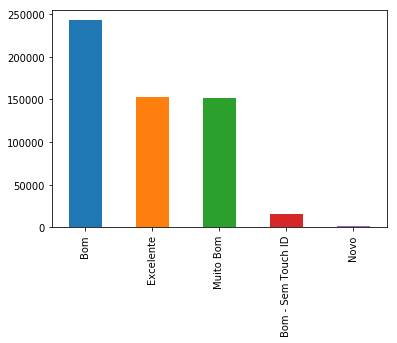

In [233]:
# Cantidad de productos (por 'condition') que tenemos en el dataset:

df['condition'].value_counts().plot(kind='bar')

## Modelos no disponibles con más pedidos de notificación de stock 

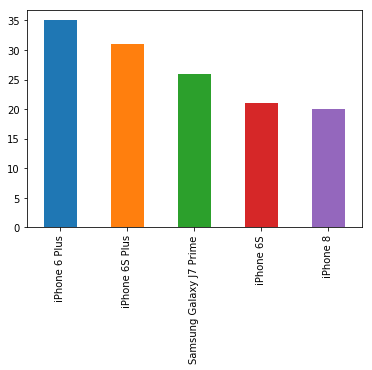

In [262]:
df_event_mod = df.filter(items = ['event', 'model'])
df_event_mod.loc[df_event_mod['event'] == 'lead']['model'].value_counts().head().plot(kind='bar')

# 'new vs returning' por mes

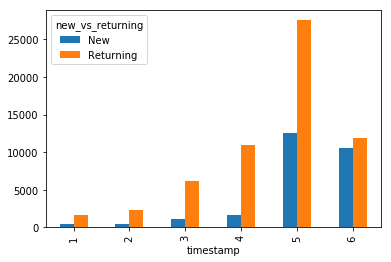

In [263]:
df_new_vs_ret = df.filter(items = ['event', 'new_vs_returning'])
df.groupby([df['timestamp'].dt.month, 'new_vs_returning']).size().unstack().plot(kind='bar')